In [10]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  bfn1001
working directory set to /home/hbkoziel/pyfesom


In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import cmocean as cmaps
#from matplotlib.colors import ListedColormap

In [12]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = cmaps.cm.ice
# choose simulation
runid='Arc12'
# choose depth
get3d = False
# variable ID
var_id= 'area'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'


# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [13]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=get3d)

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [14]:
mesh


FESOM mesh:
path                  = /gfs2/work/hbkvsk12/mesh/meshArc4.5
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 753179
number of 2d elements = 1480268
number of 3d nodes    = 16950142

        

In [15]:
year = 2015
mo = 6

In [16]:
if mo ==4: 
    dayind = (range(45,59))
    month='APR'
elif mo ==5: 
    dayind = (range(60,74))
    month='MAY'
elif mo ==6: 
    dayind = (range(75,89))
    month='JUN'
elif mo ==7: 
    dayind = (range(90,105))
    month='JUL'
elif mo ==8:
    dayind = (range(106,120))
    month='AUG'
elif mo ==9: 
    dayind = (range(121,135))
    month='SEP'

In [17]:
# loop over years

print year
print month
ncfile = resultpath+runid+'.'+str(year)+'.ice.mean.nc'
print ncfile
f      = Dataset(ncfile, 'r')
if year<2000:
    ice    = f.variables[var_id][mo,0:mesh.n2d]
else:
    ice    = f.variables[var_id][dayind,0:mesh.n2d].mean(axis=0)


data2 = ice
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.mean(data2)
print 'Max and min: ',np.max(data2),np.min(data2)

2015
JUN
/scratch/usr/hbkvsk12/hlrn3_work2/results/Arc12/Oldfiles/Arc12.2015.ice.mean.nc
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  0.514534
Max and min:  1.0 0.0


ftriplot, number of dummy points: 0


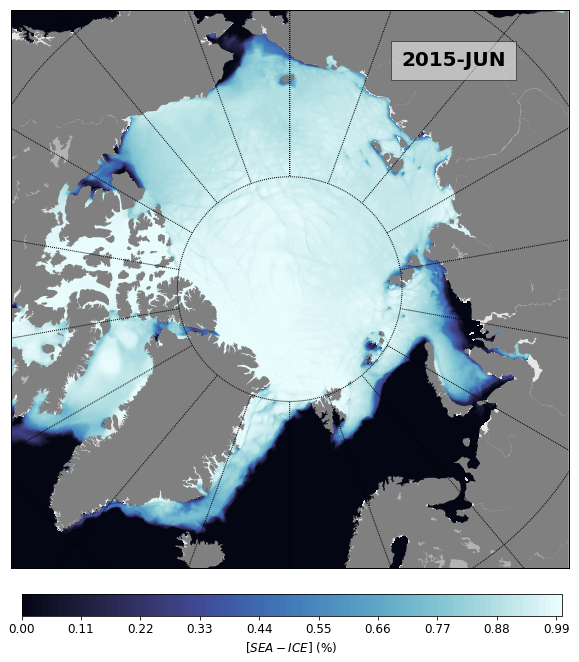

In [18]:
contours = [0, 1, 0.01]
contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
#contours=np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
fig.subplots_adjust(wspace=0.02,hspace=0.02)
elem2=mesh.elem[mesh.no_cyclic_elem,:]

d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate(str(year)+'-'+month, xy=(0.7, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

cbar_ax = fig.add_axes([0.14, 0.2, 0.75, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cb.set_label(label='$[SEA-ICE]$ (%)', size='large')
cb.ax.tick_params(labelsize='large')